In [ ]:
!pip install git+https://github.com/huggingface/diffusers

 https://stackoverflow.com/questions/74279005/tokenizer-from-file-hugginface-exception-data-did-not-match-any-variant-of

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# run `pip install git+https://github.com/huggingface/diffusers` before use Sana in diffusers
import torch
from diffusers import SanaPipeline

pipe = SanaPipeline.from_pretrained(
    "Efficient-Large-Model/SANA1.5_1.6B_1024px_diffusers",
    # "Efficient-Large-Model/Sana_600M_1024px",
    torch_dtype=torch.bfloat16,
)
pipe.to("cuda")

pipe.vae.to(torch.bfloat16)
pipe.text_encoder.to(torch.bfloat16)

prompt = 'a cyberpunk cat with a neon sign that says "Sana"'
image = pipe(
    prompt=prompt,
    height=1024,
    width=1024,
    guidance_scale=4.5,
    num_inference_steps=20,
    generator=torch.Generator(device="cuda").manual_seed(42),
)[0]

image[0].save("sana.png")

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/si

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

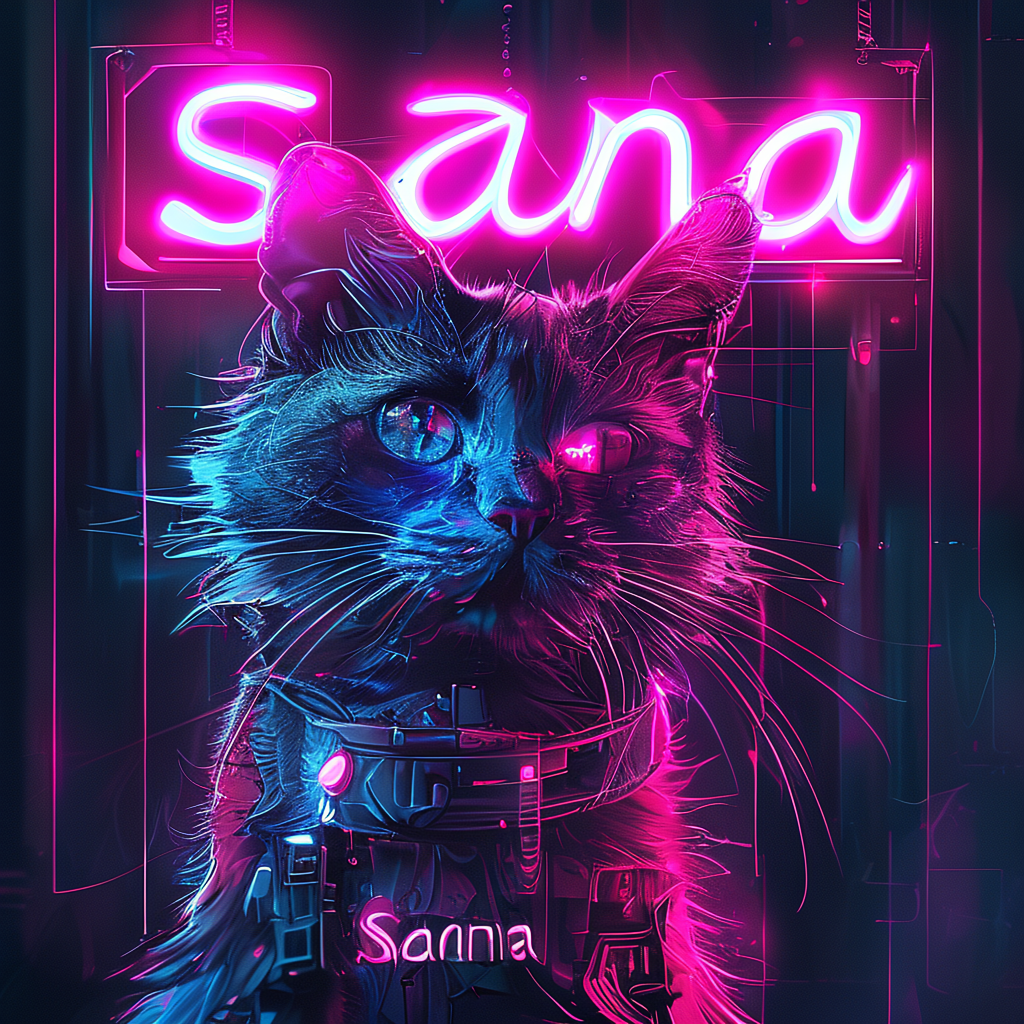

In [4]:
image[0]

  0%|          | 0/20 [00:00<?, ?it/s]

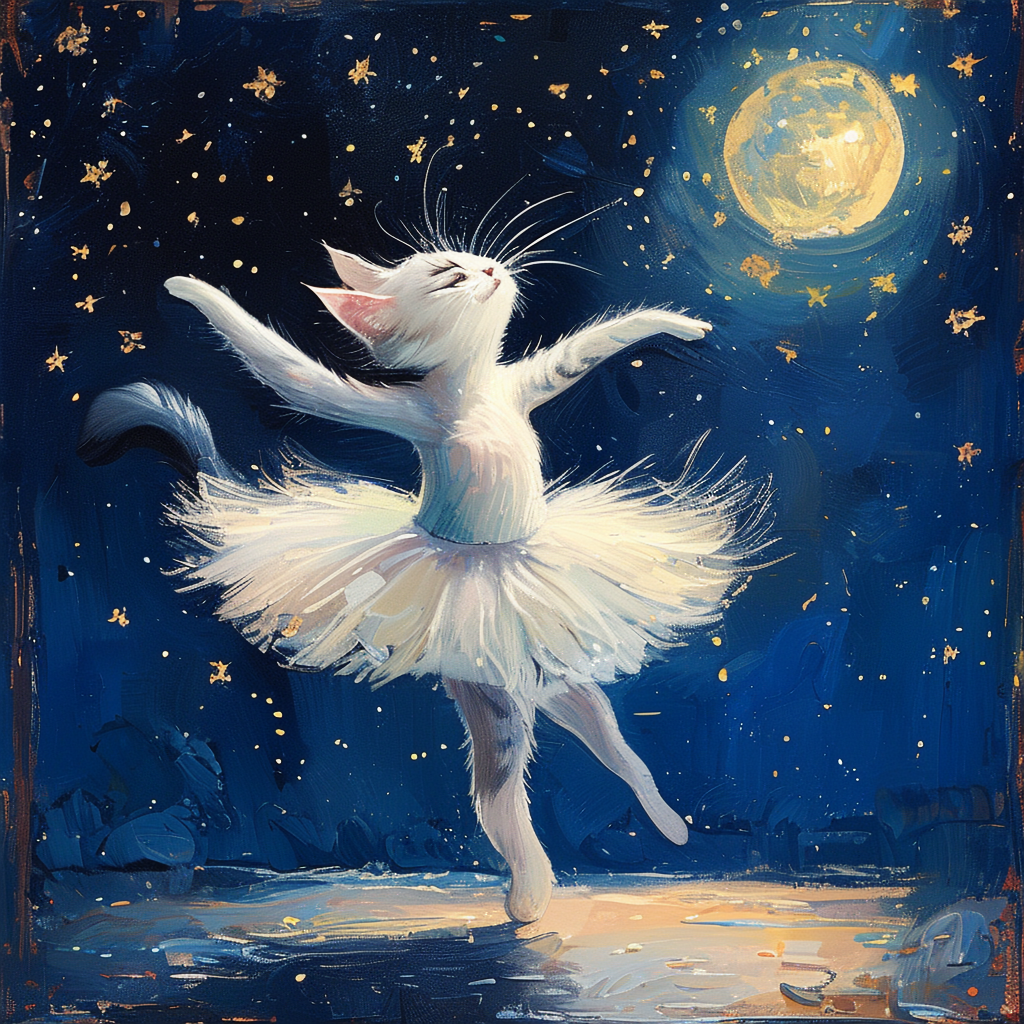

In [22]:
prompt = 'a ballerina cat dancing under the starry night'
image = pipe(
    prompt=prompt,
    height=1024,
    width=1024,
    guidance_scale=2.5,
    num_inference_steps=20,
    generator=torch.Generator(device="cuda").manual_seed(10),
)[0]
image[0]

  0%|          | 0/20 [00:00<?, ?it/s]

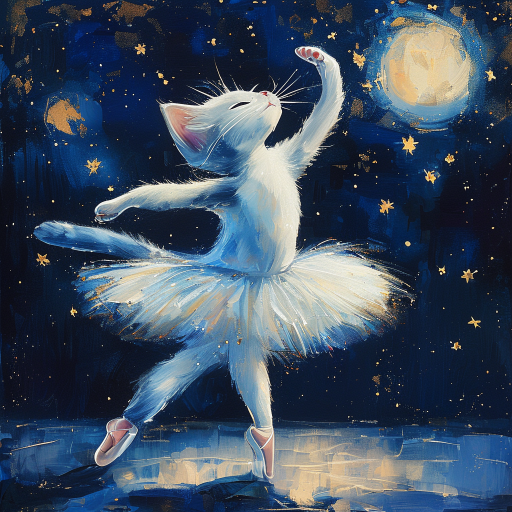

In [24]:
prompt = 'a ballerina cat dancing under the starry night'
image = pipe(
    prompt=prompt,
    height=512,
    width=512,
    guidance_scale=2.5,
    num_inference_steps=20,
    generator=torch.Generator(device="cuda").manual_seed(42),
)[0]
image[0]

  0%|          | 0/20 [00:00<?, ?it/s]

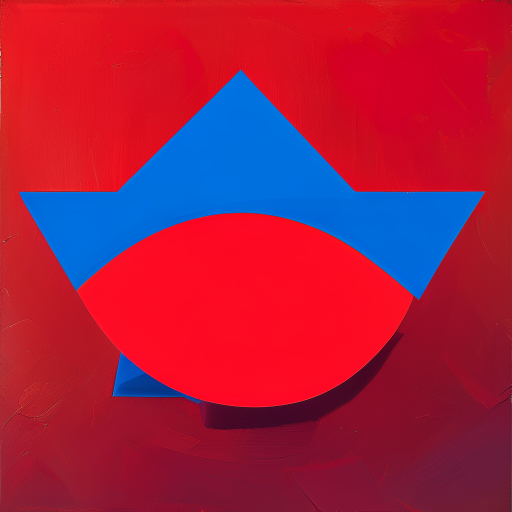

In [38]:
prompt = 'A red circle to the left of blue triangle'
image = pipe(
    prompt=prompt,
    height=512,
    width=512,
    guidance_scale=2.5,
    num_inference_steps=20,
    generator=torch.Generator(device="cuda").manual_seed(45),
)[0]
image[0]

  0%|          | 0/20 [00:00<?, ?it/s]

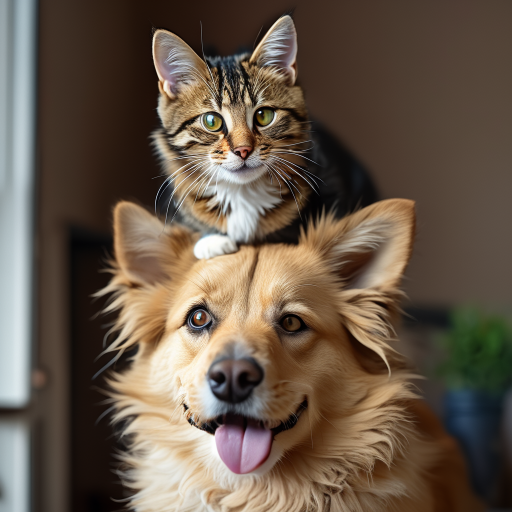

In [46]:
prompt = 'A cat sitting on top of a dog'
image = pipe(
    prompt=prompt,
    height=512,
    width=512,
    guidance_scale=2.5,
    num_inference_steps=20,
    generator=torch.Generator(device="cuda").manual_seed(22),
)[0]
image[0]

  0%|          | 0/20 [00:00<?, ?it/s]

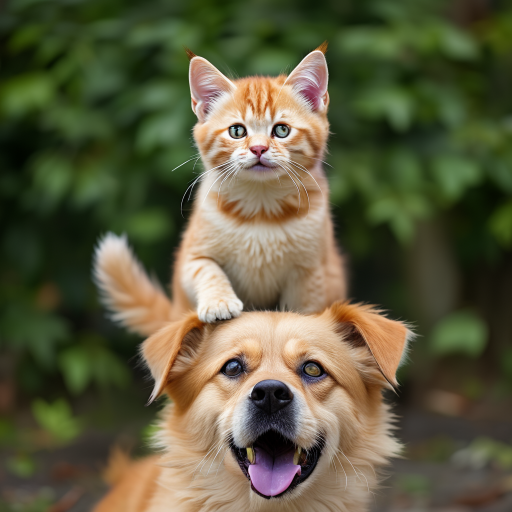

In [47]:
prompt = 'A cat sitting on top of a dog'
image = pipe(
    prompt=prompt,
    height=512,
    width=512,
    guidance_scale=2.5,
    num_inference_steps=20,
    generator=torch.Generator(device="cuda").manual_seed(33),
)[0]
image[0]

  0%|          | 0/20 [00:00<?, ?it/s]

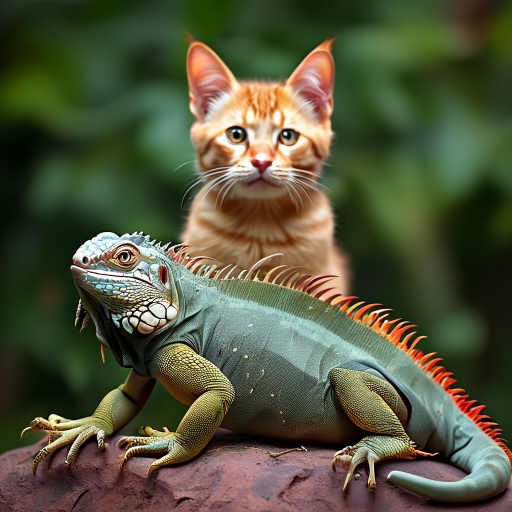

In [48]:
prompt = 'A cat sitting on top of an iguana'
image = pipe(
    prompt=prompt,
    height=512,
    width=512,
    guidance_scale=2.5,
    num_inference_steps=20,
    generator=torch.Generator(device="cuda").manual_seed(33),
)[0]
image[0]

### Inspect architecture

In [10]:
pipe.transformer

SanaTransformer2DModel(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(32, 2240, kernel_size=(1, 1), stride=(1, 1))
  )
  (time_embed): AdaLayerNormSingle(
    (emb): PixArtAlphaCombinedTimestepSizeEmbeddings(
      (time_proj): Timesteps()
      (timestep_embedder): TimestepEmbedding(
        (linear_1): Linear(in_features=256, out_features=2240, bias=True)
        (act): SiLU()
        (linear_2): Linear(in_features=2240, out_features=2240, bias=True)
      )
    )
    (silu): SiLU()
    (linear): Linear(in_features=2240, out_features=13440, bias=True)
  )
  (caption_projection): PixArtAlphaTextProjection(
    (linear_1): Linear(in_features=2304, out_features=2240, bias=True)
    (act_1): GELU(approximate='tanh')
    (linear_2): Linear(in_features=2240, out_features=2240, bias=True)
  )
  (caption_norm): RMSNorm()
  (transformer_blocks): ModuleList(
    (0-19): 20 x SanaTransformerBlock(
      (norm1): LayerNorm((2240,), eps=1e-06, elementwise_affine=False)
      (attn1): Attention(

In [11]:
pipe.transformer.transformer_blocks[0]

SanaTransformerBlock(
  (norm1): LayerNorm((2240,), eps=1e-06, elementwise_affine=False)
  (attn1): Attention(
    (norm_q): RMSNorm()
    (norm_k): RMSNorm()
    (to_q): Linear(in_features=2240, out_features=2240, bias=False)
    (to_k): Linear(in_features=2240, out_features=2240, bias=False)
    (to_v): Linear(in_features=2240, out_features=2240, bias=False)
    (to_out): ModuleList(
      (0): Linear(in_features=2240, out_features=2240, bias=True)
      (1): Dropout(p=0.0, inplace=False)
    )
  )
  (norm2): LayerNorm((2240,), eps=1e-06, elementwise_affine=False)
  (attn2): Attention(
    (norm_q): RMSNorm()
    (norm_k): RMSNorm()
    (to_q): Linear(in_features=2240, out_features=2240, bias=True)
    (to_k): Linear(in_features=2240, out_features=2240, bias=True)
    (to_v): Linear(in_features=2240, out_features=2240, bias=True)
    (to_out): ModuleList(
      (0): Linear(in_features=2240, out_features=2240, bias=True)
      (1): Dropout(p=0.0, inplace=False)
    )
  )
  (ff): GLUMB

### Linear attention processing of Sana

In [19]:
from inspect import getsource
print(getsource(pipe.transformer.transformer_blocks[0].attn1.forward))
print("Self attention block, processor.__call__ (linear attention)")
print(getsource(pipe.transformer.transformer_blocks[0].attn1.processor.__call__))
print(getsource(pipe.transformer.transformer_blocks[0].attn2.forward))
print("Cross attention block, processor.__call__ (Standard scaled dot product attention)")
print(getsource(pipe.transformer.transformer_blocks[0].attn2.processor.__call__))

    def forward(
        self,
        hidden_states: torch.Tensor,
        encoder_hidden_states: Optional[torch.Tensor] = None,
        attention_mask: Optional[torch.Tensor] = None,
        **cross_attention_kwargs,
    ) -> torch.Tensor:
        r"""
        The forward method of the `Attention` class.

        Args:
            hidden_states (`torch.Tensor`):
                The hidden states of the query.
            encoder_hidden_states (`torch.Tensor`, *optional*):
                The hidden states of the encoder.
            attention_mask (`torch.Tensor`, *optional*):
                The attention mask to use. If `None`, no mask is applied.
            **cross_attention_kwargs:
                Additional keyword arguments to pass along to the cross attention.

        Returns:
            `torch.Tensor`: The output of the attention layer.
        """
        # The `Attention` class can call different attention processors / attention functions
        # here we simply pass al

In [13]:
pipe.transformer.transformer_blocks[0].attn2

Attention(
  (norm_q): RMSNorm()
  (norm_k): RMSNorm()
  (to_q): Linear(in_features=2240, out_features=2240, bias=True)
  (to_k): Linear(in_features=2240, out_features=2240, bias=True)
  (to_v): Linear(in_features=2240, out_features=2240, bias=True)
  (to_out): ModuleList(
    (0): Linear(in_features=2240, out_features=2240, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
)

In [4]:
!pip list transformers

Package                          Version                       Editable project location
-------------------------------- ----------------------------- ------------------------------------------
absl-py                          2.1.0
accelerate                       1.0.1
addict                           2.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
altair                           5.5.0
annotated-types                  0.7.0
antialiased-cnns                 0.3
anyio                            4.4.0
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
arrow                            1.3.0
asttokens                        2.4.1
async-lru                        2.0.4
async-timeout                    4.0.3
attrs                            23.2.0
audioread                        3.0.1
Babel                            2.14.0
beartype                         0.14.1
beautifulsoup4                   4.12.3
better-abc           

In [3]:
!mamba list transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# packages in environment at /n/home12/binxuwang/.conda/envs/torch2:
#
# Name                    Version                   Build  Channel
transformers              4.53.2                   pypi_0    pypi
